In [1]:
# download data from kaggle hub

import kagglehub

path = kagglehub.dataset_download("devzohaib/eligibility-prediction-for-loan")

print("Path to dataset files:", path)

# import os to reach to csv file
import os

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        break  # Stop searching once the CSV is found

100%|██████████| 7.80k/7.80k [00:00<00:00, 8.95MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/devzohaib/eligibility-prediction-for-loan/versions/1


In [2]:
# import all the necessary libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = pd.read_csv(filepath)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#checking for null data
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
# fill the columns with object data type with mode.

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

In [11]:
# filling the null numerical values with mean
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean(), inplace=True)

<ipython-input-11-8ad0e43e8b8c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
<ipython-input-11-8ad0e43e8b8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [12]:
# checking for null values again
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: xlabel='Credit_History', ylabel='count'>

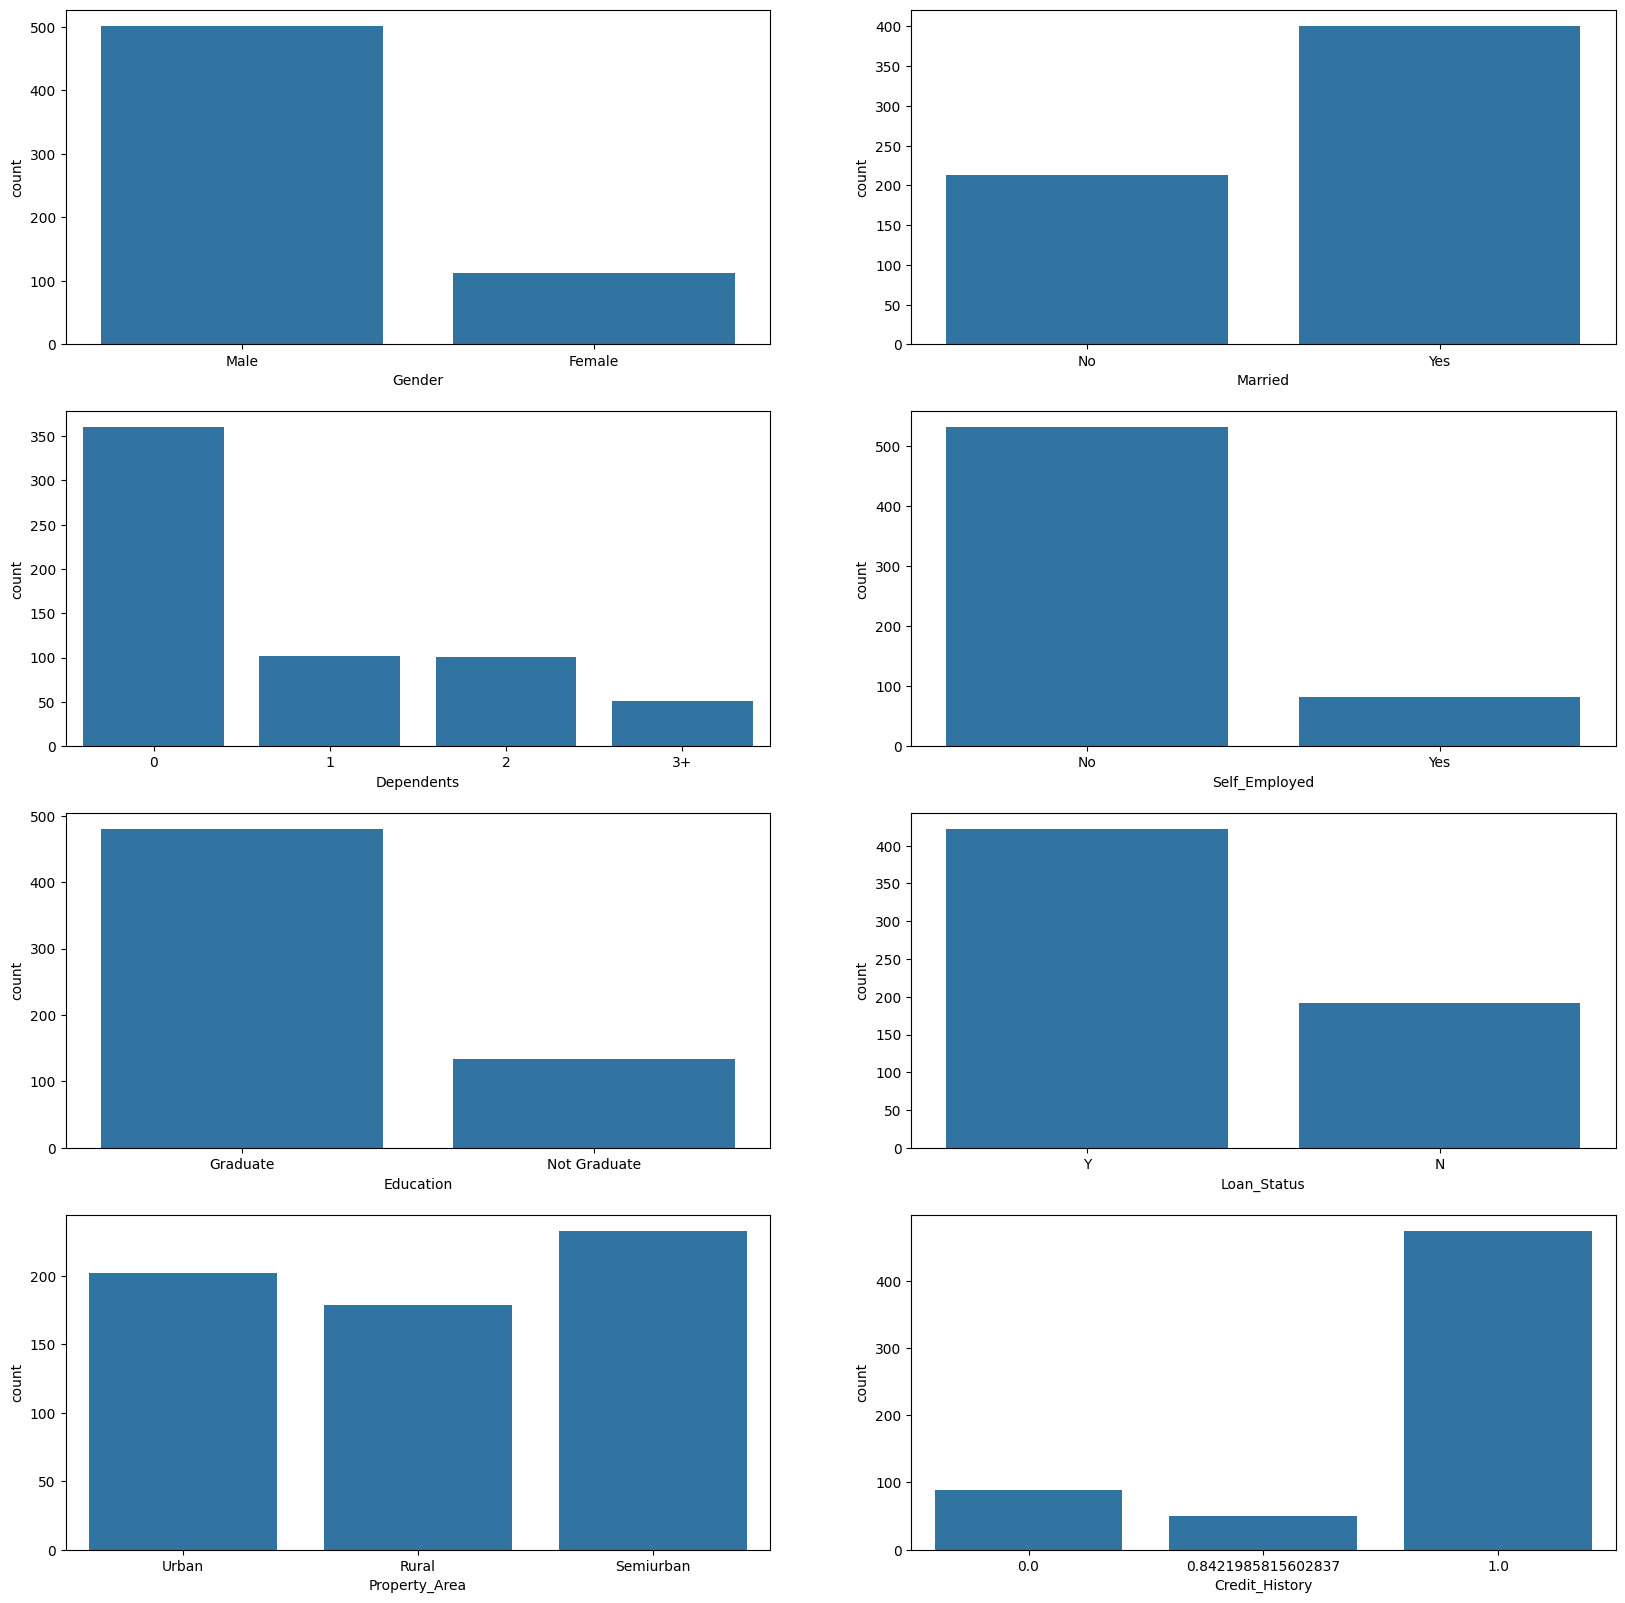

In [13]:
# doing some basic EDA for Discrete categories

plt.figure(figsize = (20,20)) # determine the width and height of the graph

plt.subplot(4,2,1)
sns.countplot(x='Gender', data = loan_data)
plt.subplot(4,2,2)
sns.countplot(x='Married', data = loan_data)
plt.subplot(4,2,3)
sns.countplot(x='Dependents', data = loan_data)
plt.subplot(4,2,4)
sns.countplot(x='Self_Employed', data = loan_data)
plt.subplot(4,2,5)
sns.countplot(x='Education', data = loan_data)
plt.subplot(4,2,6)
sns.countplot(x= 'Loan_Status', data = loan_data)
plt.subplot(4,2,7)
sns.countplot(x='Property_Area', data = loan_data)
plt.subplot(4,2,8)
sns.countplot(x='Credit_History', data = loan_data)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

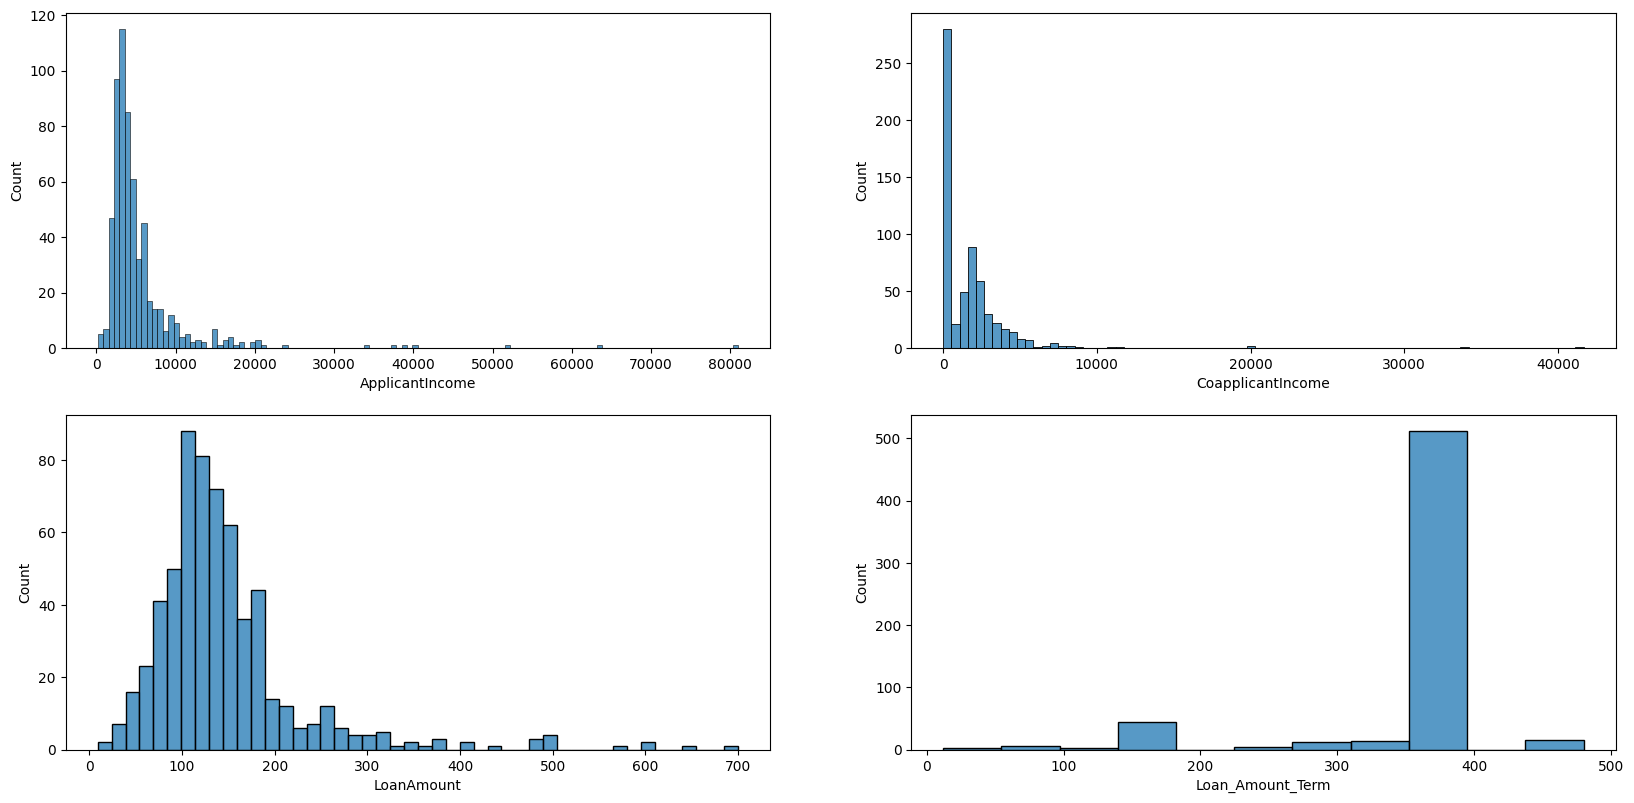

In [14]:
# EDA of Continuos Categories

plt.figure(figsize = (20,20)) # determine the width and height of the graph

plt.subplot(4,2,1)
sns.histplot(loan_data['ApplicantIncome'])
plt.subplot(4,2,2)
sns.histplot(loan_data['CoapplicantIncome'])
plt.subplot(4,2,3)
sns.histplot(loan_data['LoanAmount'])
plt.subplot(4,2,4)
sns.histplot(loan_data['Loan_Amount_Term'])

<Axes: >

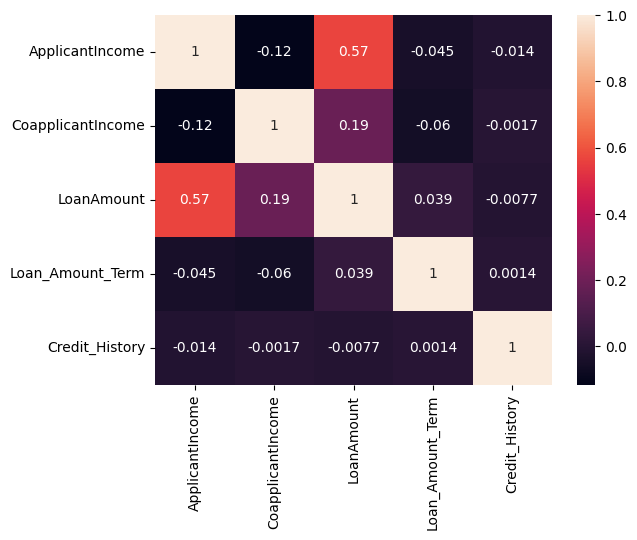

In [15]:
# heatmap of all numerical parameters
sns.heatmap(loan_data.corr(numeric_only=True), annot=True)



In [20]:
#importing all the libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#transforming the categorical data into numerical data

label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()

loan_data['Gender']= label_encoder_Gender .fit_transform(loan_data['Gender'])
loan_data['Gender'].unique()
loan_data['Married']= label_encoder_Married .fit_transform(loan_data['Married'])
loan_data['Married'].unique()
loan_data['Dependents']= label_encoder_Dependents .fit_transform(loan_data['Dependents'])
loan_data['Dependents'].unique()
loan_data['Education']= label_encoder_Education .fit_transform(loan_data['Education'])
loan_data['Education'].unique()
loan_data['Self_Employed']= label_encoder_Self_Employed .fit_transform(loan_data['Self_Employed'])
loan_data['Self_Employed'].unique()
loan_data['Property_Area']= label_encoder_Property_Area .fit_transform(loan_data['Property_Area'])
loan_data['Property_Area'].unique()



array([2, 0, 1])

In [23]:
# training the model
x = loan_data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = loan_data['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

predictions = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7886178861788617
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [24]:
import pickle

pickle.dump(model, open('loan_prediction_model.pkl', 'wb'))
pickle.dump(scaler, open('loan_prediction_scaler.pkl', 'wb'))

from google.colab import files

files.download('loan_prediction_model.pkl')
files.download('loan_prediction_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>